In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

os.chdir(os.path.dirname(os.getcwd()))      # Move to parent directory

from utils import compute_difficulty_index, compute_bmi


### ```cyclists``` dataset

In [2]:
cyclists_df = pd.read_csv('dataset/cyclists_outlier.csv')

In [3]:
print(cyclists_df.columns)

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'experience_cat', 'continent', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'min_relative_position', 'avg_performance_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std', 'top_cyclists'],
      dtype='object')


In [4]:
numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'min_relative_position', 'avg_performance_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

Take only numerical columns 

In [5]:
# ALL numeric columns: 
# ['birth_year', 'cyclist_win', 'carreer_level', 'best_position', 'best_position_std', 'cyclist_experience', weighted_podiums]

cluster_0_drop = ["cyclist_win", "cyclist_experience", "avg_position", "best_position", "birth_year", 
                  "performance_entropy", "min_relative_position", "cyclist_win_ratio", "weighted_podiums", "best_position_std"]

# Create a new dataset with only the specified columns
all_cyclists_df = cyclists_df
cyclists_df = cyclists_df.drop(columns=cluster_0_drop).select_dtypes(include=['float64', 'int64'])


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,avg_relative_position,relative_position_std,avg_performance_vs_startlist,career_level
0,0.456286,0.243635,0.040912,0.918577
1,0.630686,0.205735,0.120045,-0.564982
2,0.557360,0.219011,0.085740,-0.112376
3,0.464642,0.238795,0.109783,-0.494242
4,0.589817,0.238517,0.102977,-0.141179
...,...,...,...,...
4224,0.510309,0.340690,0.075509,-0.487705
4225,0.637519,0.215697,0.157456,-0.585403
4226,0.697735,0.150866,0.141861,-0.593267
4227,0.413682,0.238513,0.079321,-0.293226


# **K-menas** of cyclists dataset 

### **Best k**

In [7]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(cyclists_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 1075.2052261052354
k: 3, SSE: 506.18335533605966
k: 4, SSE: 310.90735982804233
k: 5, SSE: 219.38114068294647
k: 6, SSE: 166.27788184281155
k: 7, SSE: 133.7733050050692
k: 8, SSE: 111.82151783953378
k: 9, SSE: 96.39876824040445
k: 10, SSE: 84.57549603539601
k: 15, SSE: 53.429584772275646
k: 20, SSE: 40.528444131623004


In [8]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 1075.2052261052354
Separation 0.5154303565575563
Silhouette 0.7524096911830371
for k = 3
SSE 506.18335533605966
Separation 0.510460988523126
Silhouette 0.6923428467849483
for k = 4
SSE 310.90735982804233
Separation 0.5370269522956704
Silhouette 0.6256789930580792
for k = 5
SSE 219.38114068294647
Separation 0.5812294771715483
Silhouette 0.5488028661187436
for k = 6
SSE 166.27788184281155
Separation 0.6031225808376156
Silhouette 0.5060584826099022
for k = 7
SSE 133.7733050050692
Separation 0.6131088983618537
Silhouette 0.48887628573746944
for k = 8
SSE 111.82151783953378
Separation 0.6978083152997168
Silhouette 0.39305168505769134
for k = 9
SSE 96.39876824040445
Separation 0.7213155230171383
Silhouette 0.3733281215933971
for k = 10
SSE 84.57549603539601
Separation 0.6893803182132239
Silhouette 0.37342139673053193
for k = 15
SSE 53.429584772275646
Separation 0.7597173415406228
Silhouette 0.3259302288469552
for k = 20
SSE 40.528444131623004
Separation 0.8544379532977677
Silho

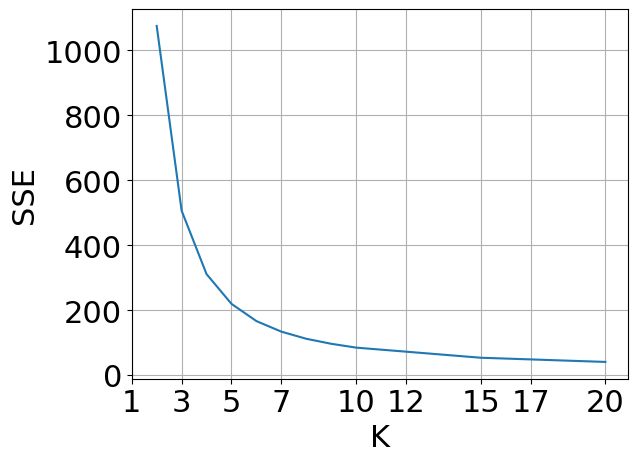

In [9]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


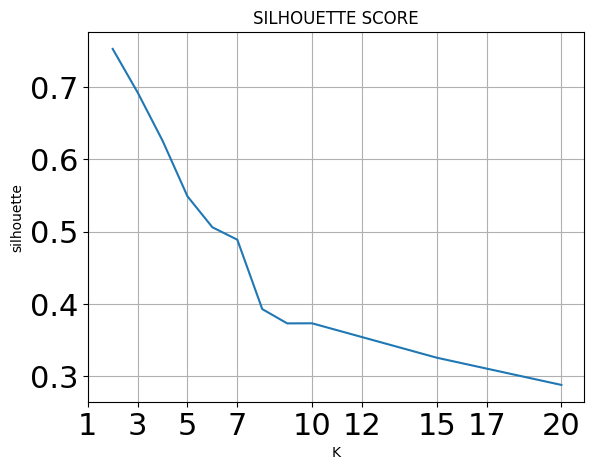

In [10]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

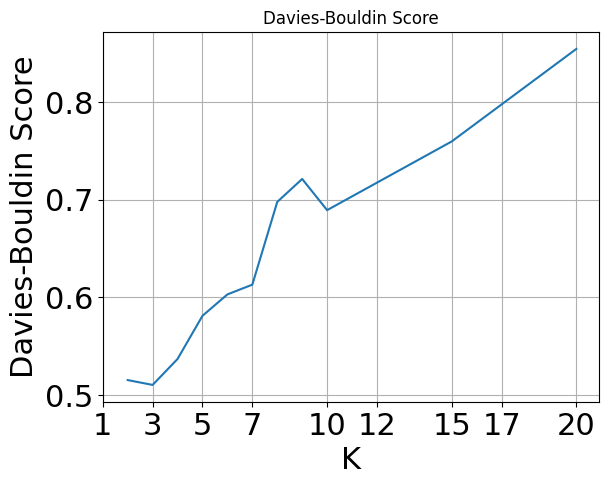

In [11]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

### **K-means resuslts** (cyclists dataset)

In [12]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(cyclist_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [13]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1362, 2290, 577]


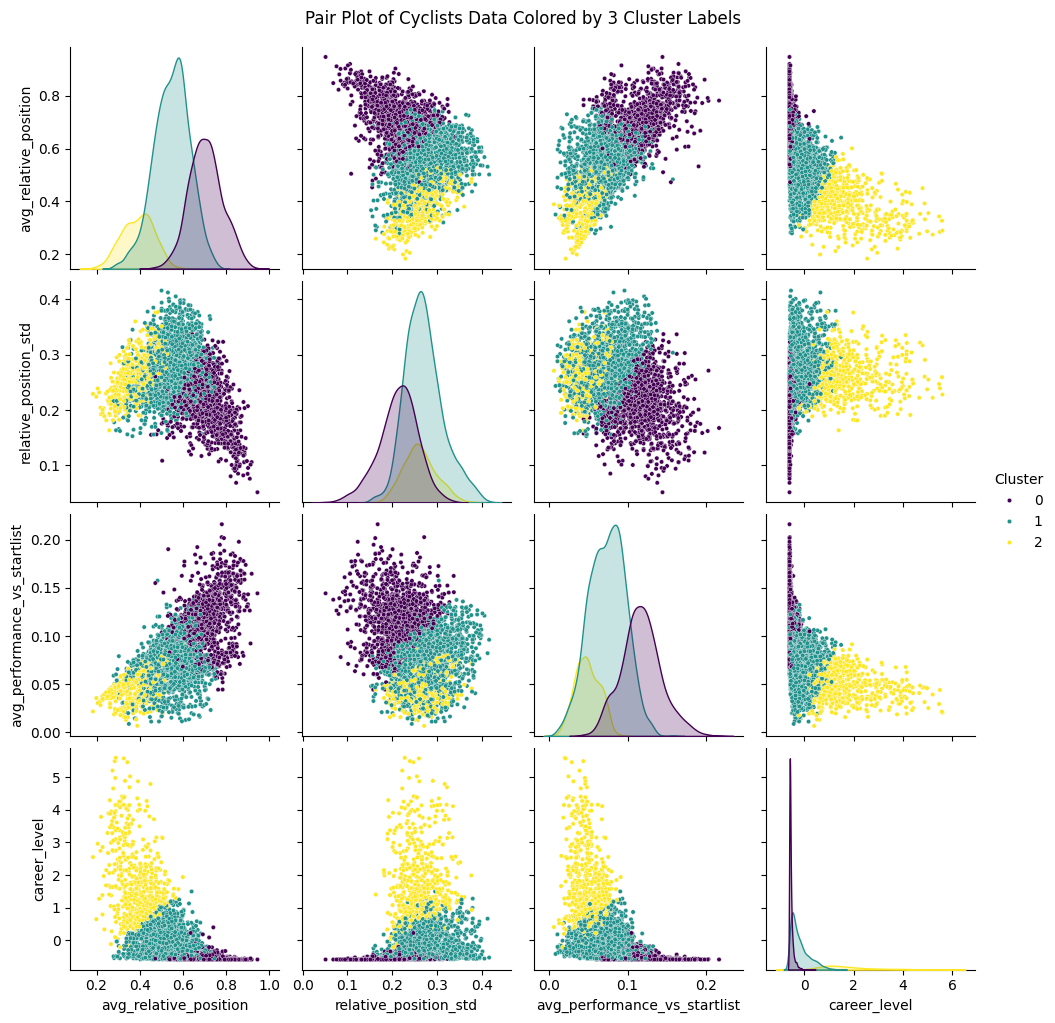

In [14]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

all_cyclists_df = all_cyclists_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



Based on the pair plot the culstering result better is chosen 

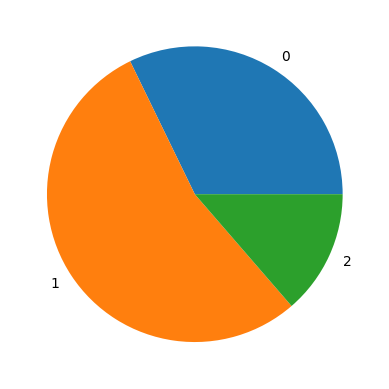

In [15]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

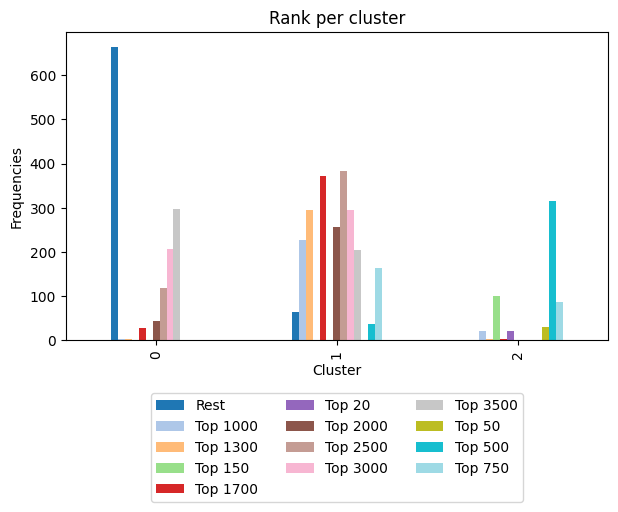

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_cyclists_df['top_cyclists'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


#### **Radar plot**

0
1
2


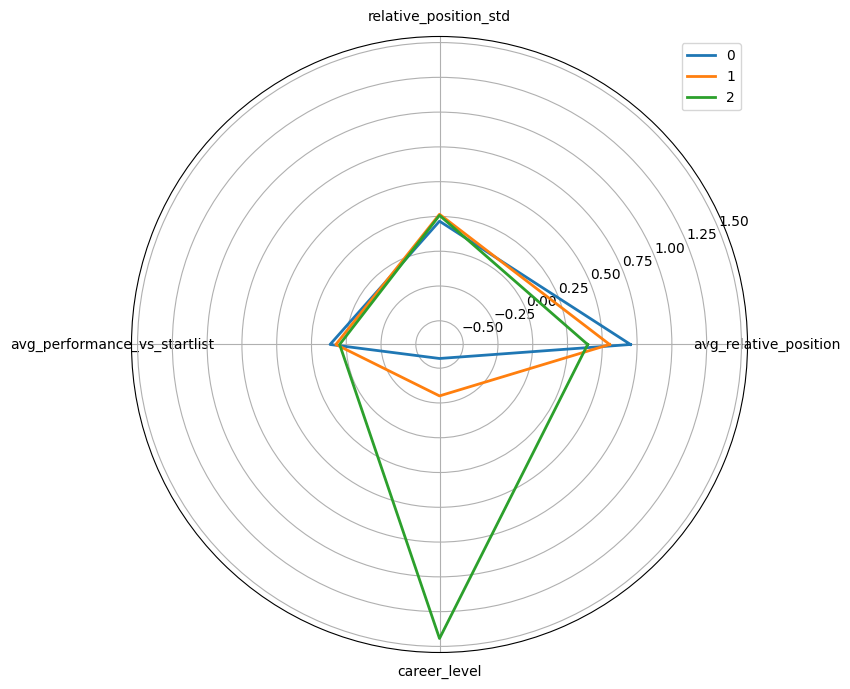

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(cyclists_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

### ```races``` dataset

In [22]:
races_df = pd.read_csv('dataset/races_clustering.csv')

In [23]:
print(races_df.columns)

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'is_tarmac', 'start_date', 'duration',
       'average_age', 'season', 'climb_intensity'],
      dtype='object')


In [24]:
numeric_columns = races_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['points', 'length', 'climb_total', 'profile', 'startlist_quality',
       'average_age', 'climb_intensity'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

In [25]:
# ALL numeric columns: 
# ['points', 'length', 'climb_total', 'profile', 'startlist_quality','average_age', 'avg_slope']

columns_preserve = ['length', 'climb_total', 'profile', 'startlist_quality','average_age']

# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(races_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



,length,climb_total,profile,startlist_quality,average_age
0,256500.0,3300.0,2.0,1251.0,28.291667
1,251800.0,3500.0,2.0,1149.0,29.061224
2,251400.0,3495.0,2.0,1140.0,28.788618
3,258000.0,3558.0,3.0,1175.0,29.240310
4,248700.0,3320.0,2.0,1120.0,28.883333
...,...,...,...,...,...
2609,258000.0,5020.0,4.0,1374.0,29.039474
2610,260700.0,3220.0,2.0,1443.0,28.413043
2611,258200.0,4662.0,2.0,1008.0,28.590909
2612,268300.0,2250.0,2.0,1357.0,28.544118


## **K-means** for reaces dataset

#### **Best K**

In [27]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 2834251918921.2466
k: 3, SSE: 1240361959673.918
k: 4, SSE: 723062312727.1714
k: 5, SSE: 484475790350.682
k: 6, SSE: 359782442235.12823
k: 7, SSE: 277841873244.82214
k: 8, SSE: 206670369361.1007
k: 9, SSE: 162825182107.64
k: 10, SSE: 130224520030.84138
k: 15, SSE: 59173886816.52225
k: 20, SSE: 36871951166.01427


In [28]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 2834251918921.2466
Separation 0.34788657183920607
Silhouette 0.7368467882314214
for k = 3
SSE 1240361959673.918
Separation 0.5131004599502528
Silhouette 0.5647241291356032
for k = 4
SSE 723062312727.1714
Separation 0.5088313428439463
Silhouette 0.5525283224367897
for k = 5
SSE 484475790350.682
Separation 0.506989227258989
Silhouette 0.5502937644558898
for k = 6
SSE 359782442235.12823
Separation 0.5033872170525194
Silhouette 0.5406295526709407
for k = 7
SSE 277841873244.82214
Separation 0.5320636837154354
Silhouette 0.5250768612996076
for k = 8
SSE 206670369361.1007
Separation 0.5218642965013666
Silhouette 0.5301319482250423
for k = 9
SSE 162825182107.64
Separation 0.5201669044879954
Silhouette 0.5337384463922512
for k = 10
SSE 130224520030.84138
Separation 0.49308662167063727
Silhouette 0.5403550670295171
for k = 15
SSE 59173886816.52225
Separation 0.5104518794094265
Silhouette 0.5219063853161836
for k = 20
SSE 36871951166.01427
Separation 0.5453927077511055
Silhouette 0.

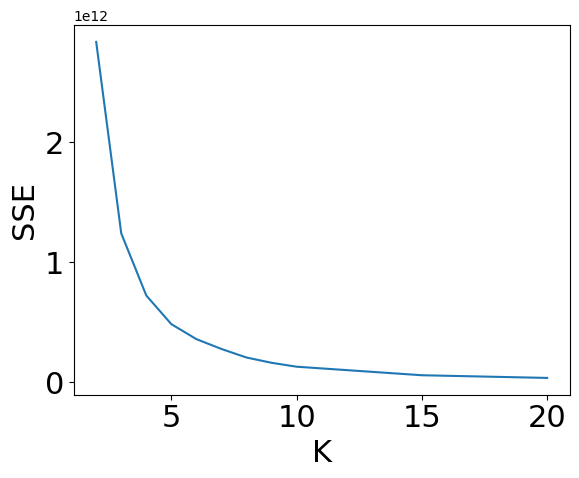

In [29]:

sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.show()

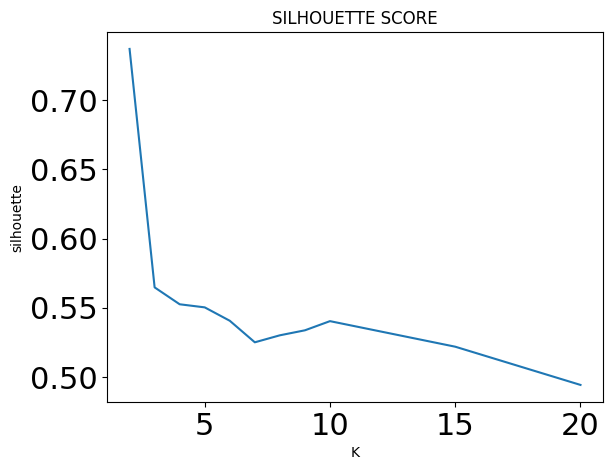

In [30]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
#plt.axvline(6)
plt.show()

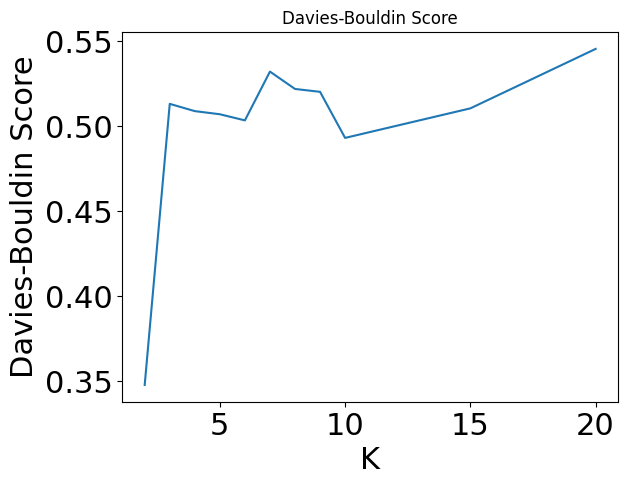

In [31]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.show()

### **K-means resuslts** (races datastet)

In [32]:
#RETRAIN BEST K-MEANS
best_k = 4
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(races_normalized_df)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [33]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1179, 714, 368, 353]


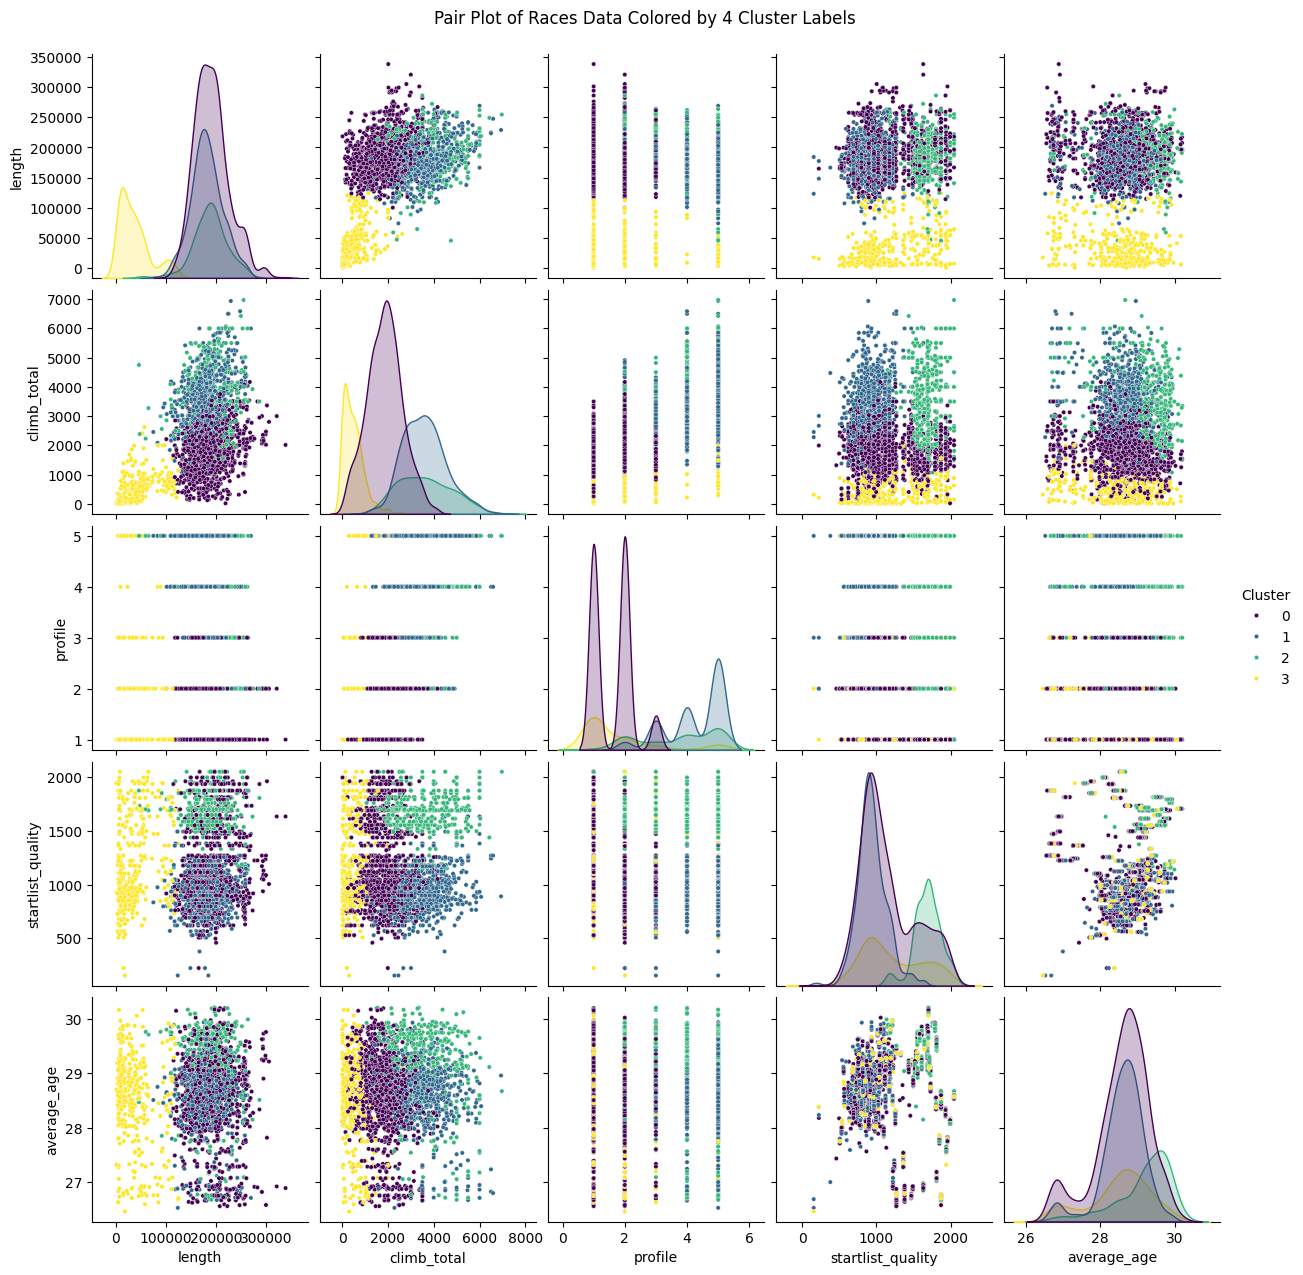

In [34]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(races_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10})
plt.suptitle(f'Pair Plot of Races Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()

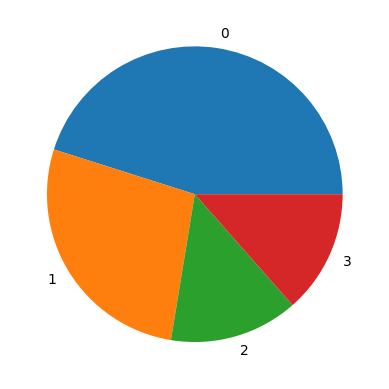

In [35]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### **Radar plot**

0
1
2
3


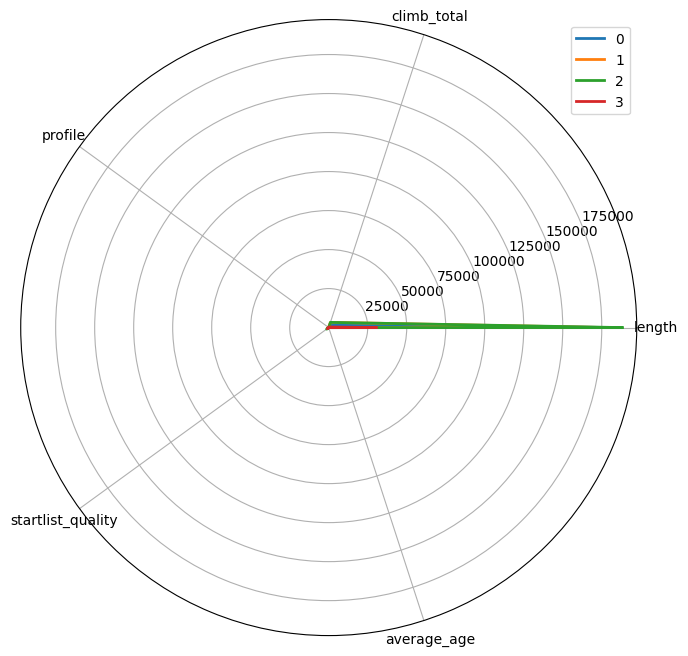

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(races_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = races_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], races_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()